## <span style="color:white"> __Introduction__ </span>

Welcome to the documentation of my work for this EDA project where I do some exploratory data analysis for my fictitious client, Jacob Phillips and present him with my recomendations 

First from the database, in the Schema EDA, there were 2 tables. king_county_house_details and king_county_house_sales. For the purpose of getting relavant data (which can be found in column_names.md) I performed a left join usind the following SQL Query



After this query I have exportred the data to a .csv file

## Understanding the Data

First we load the data from the .csv file onto a pandas dataframe

In [1]:
import pandas as pd
kcdf = pd.read_csv("data/King_County_House_prices_dataset.csv")
kcdf.head()

,id,datedate,priceprice,bedroomsnumber,bathroomsnumber,sqft_livingsquare,sqft_lotsquare,floorstotal,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,...,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0


### Column Names and descriptions for King County Data Set

- **id** - unique identified for a house
- **dateDate** - house was sold
- **pricePrice** - is prediction target
- **bedroomsNumber** - # of bedrooms
- **bathroomsNumber** - # of bathrooms
- **sqft_livingsquare** - footage of the home
- **sqft_lotsquare** - footage of the lot
- **floorsTotal** - floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Has been viewed
- **condition** - How good the condition is ( Overall )
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Preliminary examination of data

In [2]:
# Get basic descriptive statistics for numeric columns
kcdf.describe()

,id,priceprice,bedroomsnumber,bathroomsnumber,sqft_livingsquare,sqft_lotsquare,floorstotal,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
# View basic information about the dataset
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   datedate           21597 non-null  object 
 2   priceprice         21597 non-null  float64
 3   bedroomsnumber     21597 non-null  float64
 4   bathroomsnumber    21597 non-null  float64
 5   sqft_livingsquare  21597 non-null  float64
 6   sqft_lotsquare     21597 non-null  float64
 7   floorstotal        21597 non-null  float64
 8   waterfront         19206 non-null  float64
 9   view               21534 non-null  float64
 10  condition          21597 non-null  int64  
 11  grade              21597 non-null  int64  
 12  sqft_above         21597 non-null  float64
 13  sqft_basement      21145 non-null  float64
 14  yr_built           21597 non-null  int64  
 15  yr_renovated       17749 non-null  float64
 16  zipcode            215

In [4]:
# Count unique values for each column
kcdf.nunique()

id                   21420
datedate               372
priceprice            3622
bedroomsnumber          12
bathroomsnumber         29
sqft_livingsquare     1034
sqft_lotsquare        9776
floorstotal              6
waterfront               2
view                     5
condition                5
grade                   11
sqft_above             942
sqft_basement          303
yr_built               116
yr_renovated            70
zipcode                 70
lat                   5033
long                   752
sqft_living15          777
sqft_lot15            8682
dtype: int64

In [5]:
# Total missing values per column
kcdf.isnull().sum()

id                      0
datedate                0
priceprice              0
bedroomsnumber          0
bathroomsnumber         0
sqft_livingsquare       0
sqft_lotsquare          0
floorstotal             0
waterfront           2391
view                   63
condition               0
grade                   0
sqft_above              0
sqft_basement         452
yr_built                0
yr_renovated         3848
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
dtype: int64

In [6]:
# Check the percentage of missing values
missing_percentage = kcdf.isnull().sum() / len(kcdf) * 100
missing_percentage

id                    0.000000
datedate              0.000000
priceprice            0.000000
bedroomsnumber        0.000000
bathroomsnumber       0.000000
sqft_livingsquare     0.000000
sqft_lotsquare        0.000000
floorstotal           0.000000
waterfront           11.070982
view                  0.291707
condition             0.000000
grade                 0.000000
sqft_above            0.000000
sqft_basement         2.092883
yr_built              0.000000
yr_renovated         17.817289
zipcode               0.000000
lat                   0.000000
long                  0.000000
sqft_living15         0.000000
sqft_lot15            0.000000
dtype: float64

### Segregating Data Into Categorical and Continuous 

Variables are classified into Categorical and Continuous based on their nature and the type of data they represent.

#### Categorical Variables



These variables represent distinct categories or groups. They are qualitative, meaning they describe a characteristic or quality rather than a quantity.

The following are the categorical variables in our data set:
1. id
2. dateDate
3. waterfront
4. view
5. condition
6. grade
7. zipcode
8. yr_built
9. yr_renovated
10. lat
11. log

### Continuous variables

These variables represent measurable quantities. They are quantitative, meaning they measure how much or how many of something.

The following are the continuous variables in our data set:
1. pricePrice
2. bedroomsNumber
3. bathroomsNumber
4. sqft_livingsquare
5. sqft_lotsquare
6. floorsTotal
7. sqft_above
8. sqft_basement
9. sqft_living15
10. sqft_lot15

## Hypotheses

Having done very basic exploration of the data, here are some hypotheses I have made and will test during this EDA project

#### Hypothesis 1

Houses with more floors have larger living spaces 


#### Hypothesis 2

Historical houses that have been renovated have larger basement areas compared to historical houses that have not been renovated.


#### Hypothesis 3
Houses located closer to the city center have higher price per square foot compared to houses on the outskirts.

## Exploring the Data

### Continuous Variables

In [7]:
#Importing the libraries required for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def plot_histogram_boxplot(data, column):
    """
    Generates a histogram and a boxplot for a given column side by side.
    
    Args:
        data (DataFrame): The dataset containing the column.
        column (str): The name of the column to visualize.
    """
    plt.figure(figsize=(14, 6))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")


    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column], color="lightgreen")
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()



/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


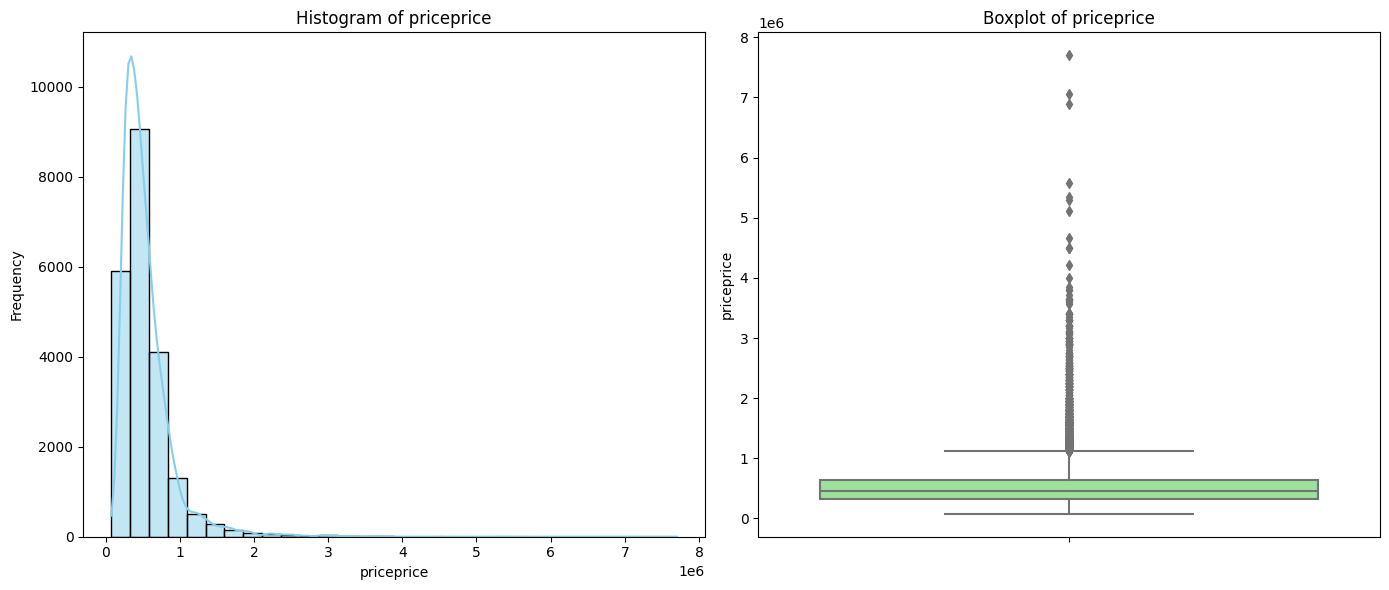

In [9]:
plot_histogram_boxplot(kcdf, "priceprice")  


Distribution: Right-skewed, indicating that most houses have lower prices, and there are fewer high-priced houses.

Extreme Values: Significant outliers in the higher price range, likely luxury properties.

Center: The distribution centers around a lower price range.



/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


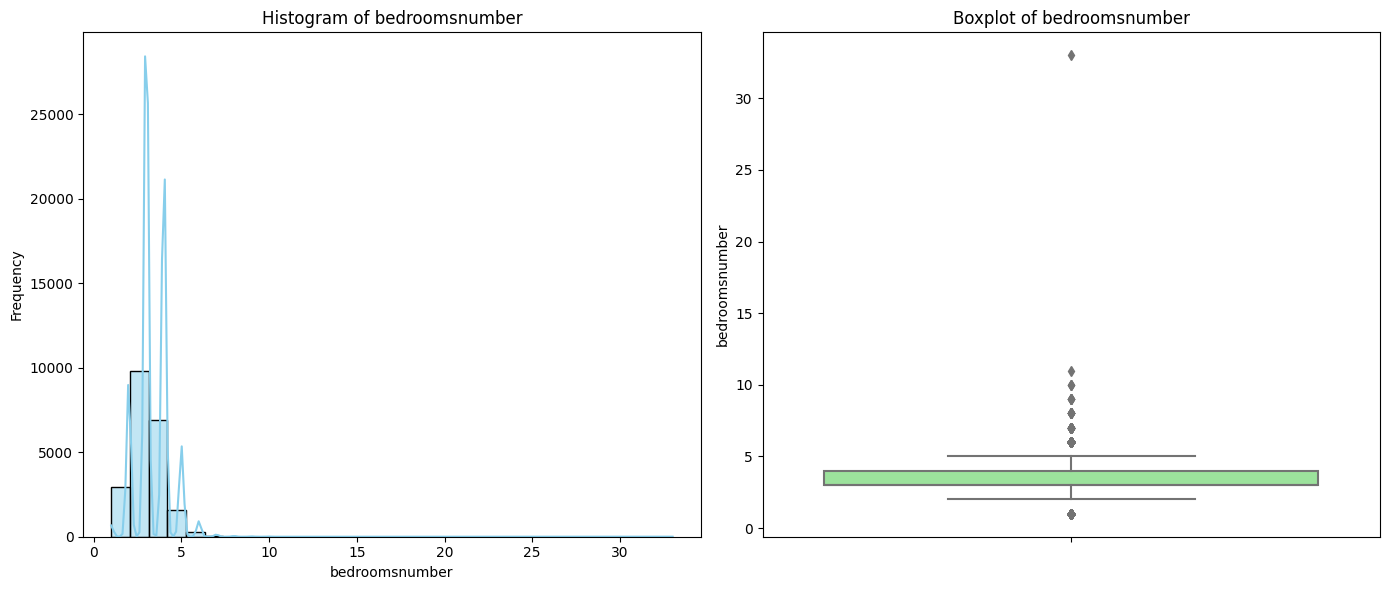

In [10]:
plot_histogram_boxplot(kcdf, "bedroomsnumber")  

Distribution: Slightly skewed, with most houses having 3-5 bedrooms.

Extreme Values: Houses with unusually high bedroom counts are outliers, but some with less bedrooms as well

Center: The data is centered around 3-4 bedrooms.

Action: investigate the outliers for data quality

/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


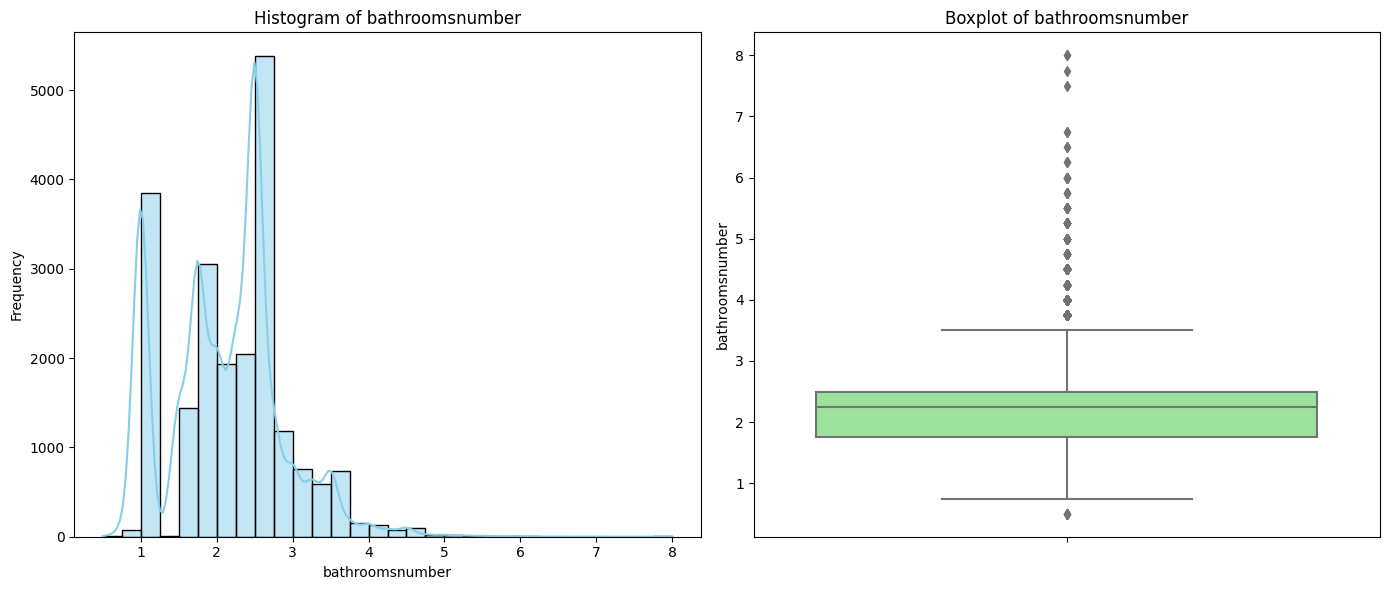

In [11]:
plot_histogram_boxplot(kcdf, "bathroomsnumber")  

Distribution: Right-skewed, with most houses having 1-3 bathrooms.

Extreme Values: Outliers exist for properties with unusually high bathroom counts.

Center: Centered around 2 bathrooms.

Action: investigate the outliers for data quality

/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


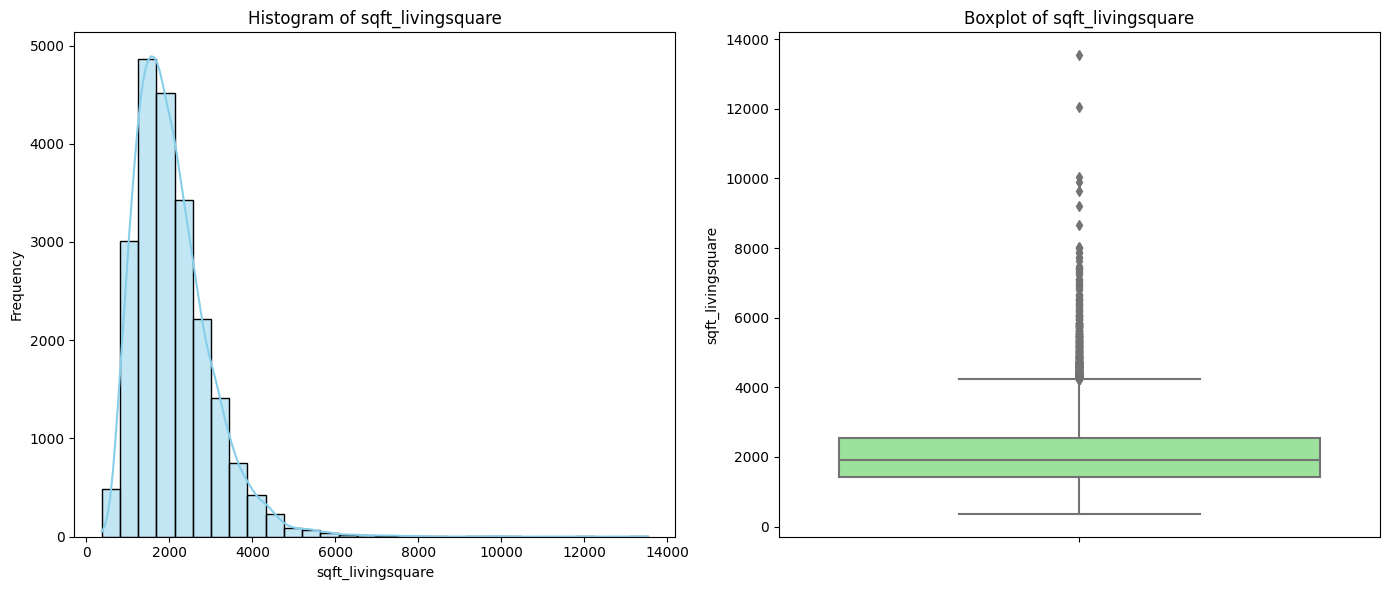

In [12]:
plot_histogram_boxplot(kcdf, "sqft_livingsquare") 

Distribution: Right-skewed, most homes fall between 1,000 to 3,000 sq ft.

Extreme Values: Very large houses or mansions are present as outliers.

Center: Around 1,500-2,000 sq ft.


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


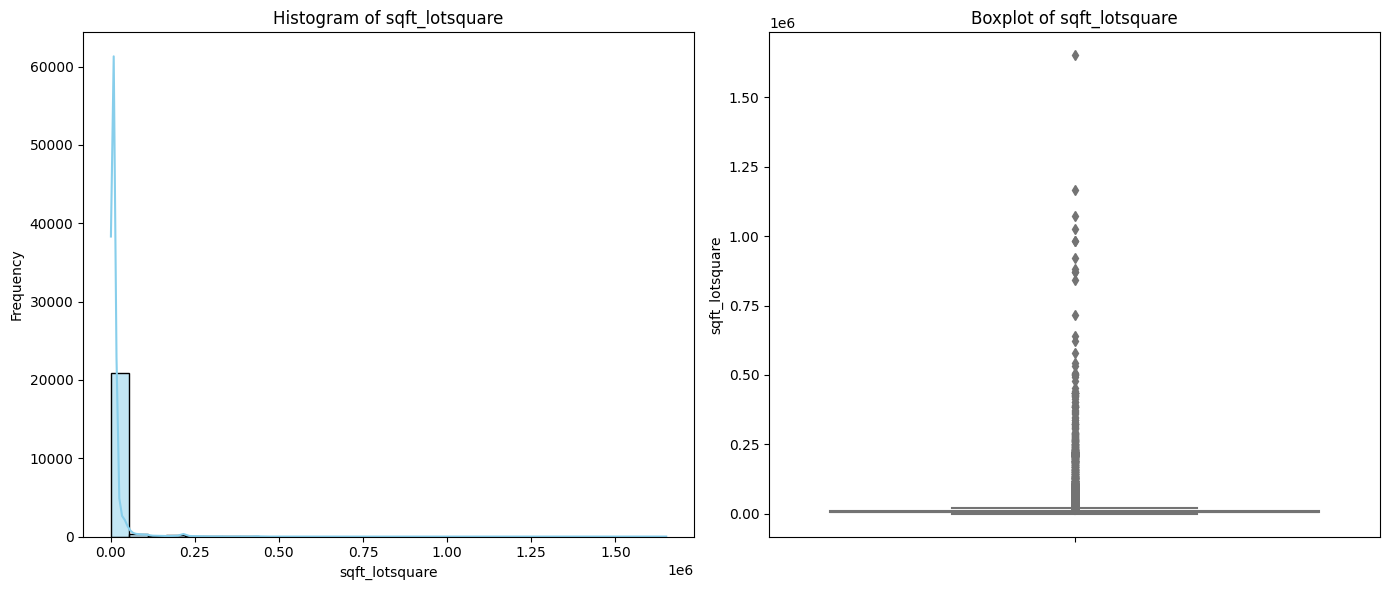

In [13]:
plot_histogram_boxplot(kcdf, "sqft_lotsquare")  

Distribution: Highly right-skewed, most lot sizes are below 15,000 sq ft.

Extreme Values: Large outliers exist, likely representing estates or rural properties.

Center: Most data is concentrated below 10,000 sq ft.

Action: Explore how to plot this graph better.


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


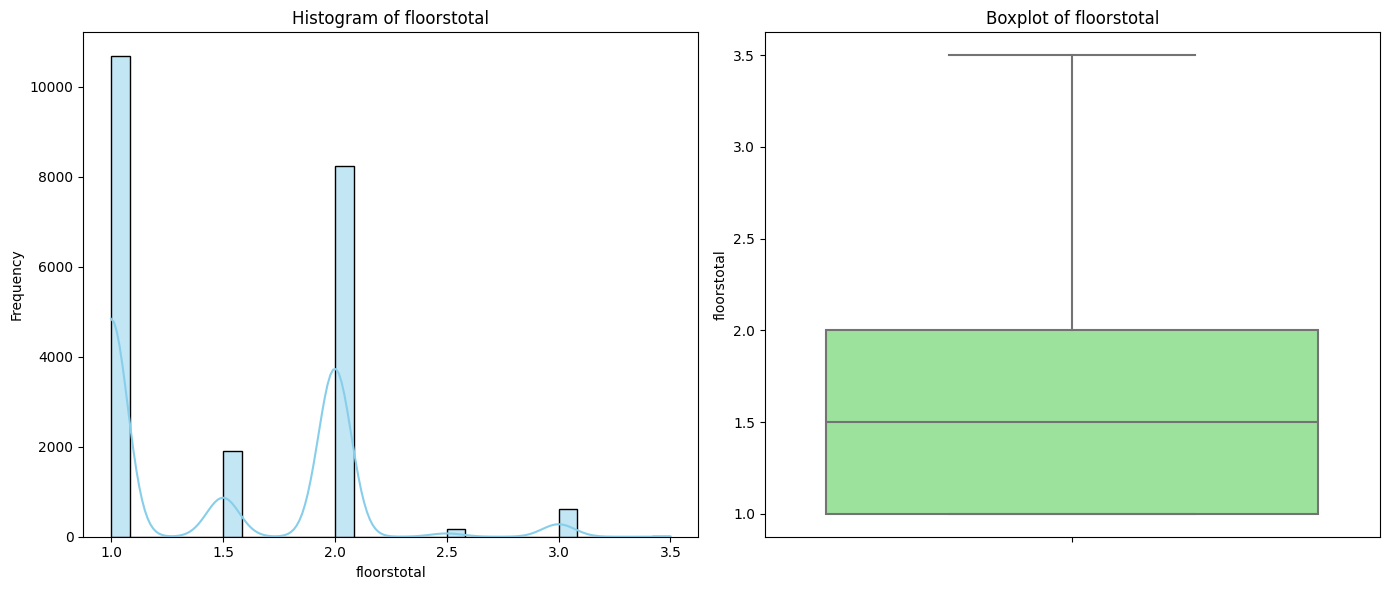

In [14]:
plot_histogram_boxplot(kcdf, "floorstotal")  

Distribution: Uniform, with most houses having 1-2 floors.

Extreme Values: Minimal outliers; relatively clean data.

Center: 1-2 floors.

/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


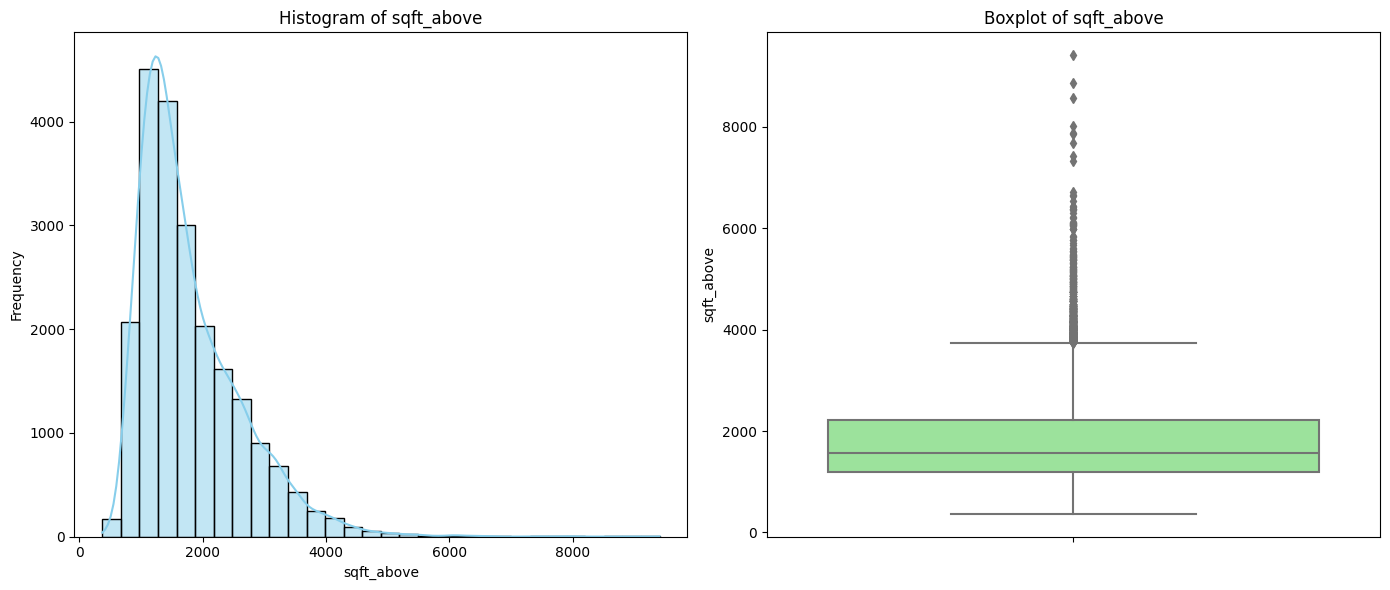

In [15]:
plot_histogram_boxplot(kcdf, "sqft_above")  

Distribution: Similar to sqft_livingsquare, right-skewed.

Extreme Values: Large houses with high above-ground square footage are outliers.

Center: Around 1,500-2,000 sq ft.

/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


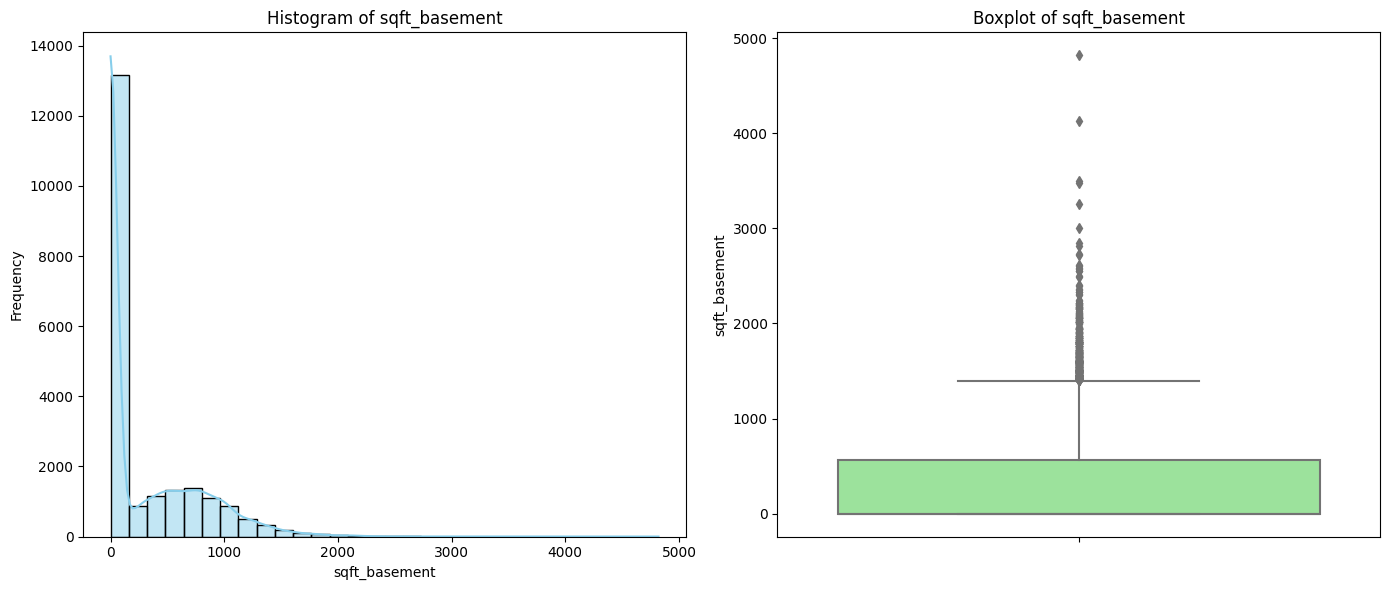

In [16]:
plot_histogram_boxplot(kcdf, "sqft_basement") 

Distribution: Peak at 0 (houses without basements), followed by a gradual right-skewed distribution.

Extreme Values: Large basements are outliers.

Center: Most houses either have no basement or a small one.

Action: Investigate unusualy large values for further review 


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


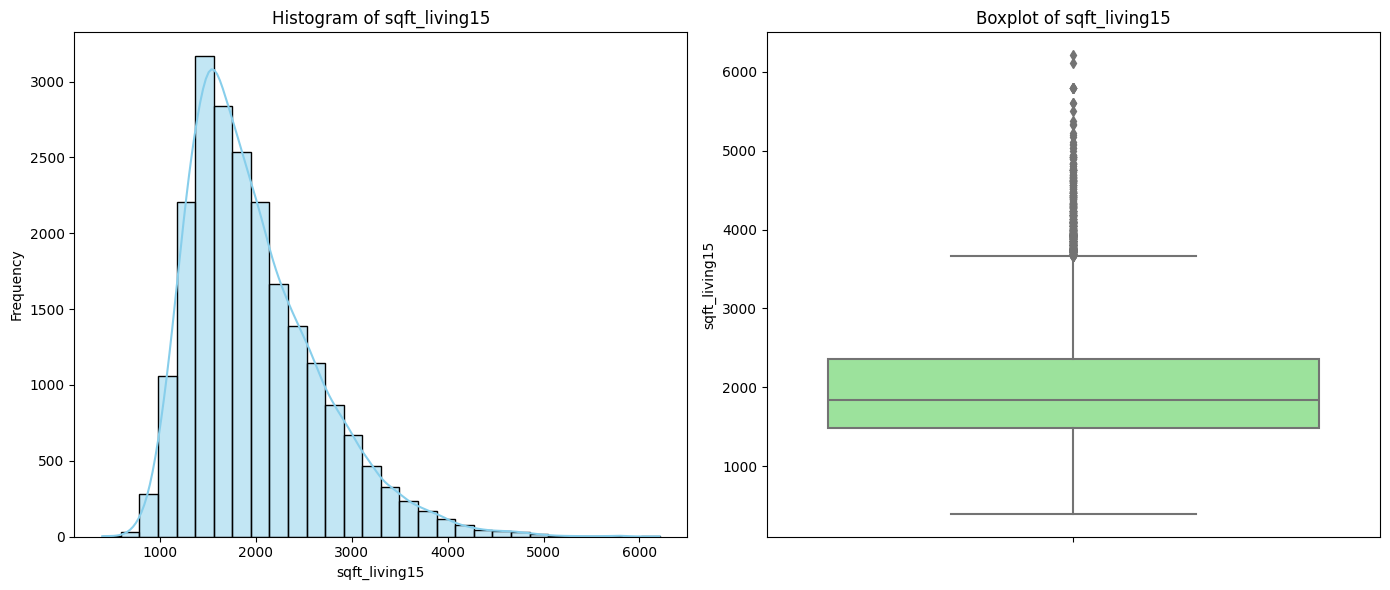

In [17]:
plot_histogram_boxplot(kcdf, "sqft_living15") 

Distribution: Similar to sqft_livingsquare, indicating neighboring properties follow similar trends.

Extreme Values: Large outliers, likely reflecting high-value neighborhoods.

Center: 1,500-2,000 sq ft.


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


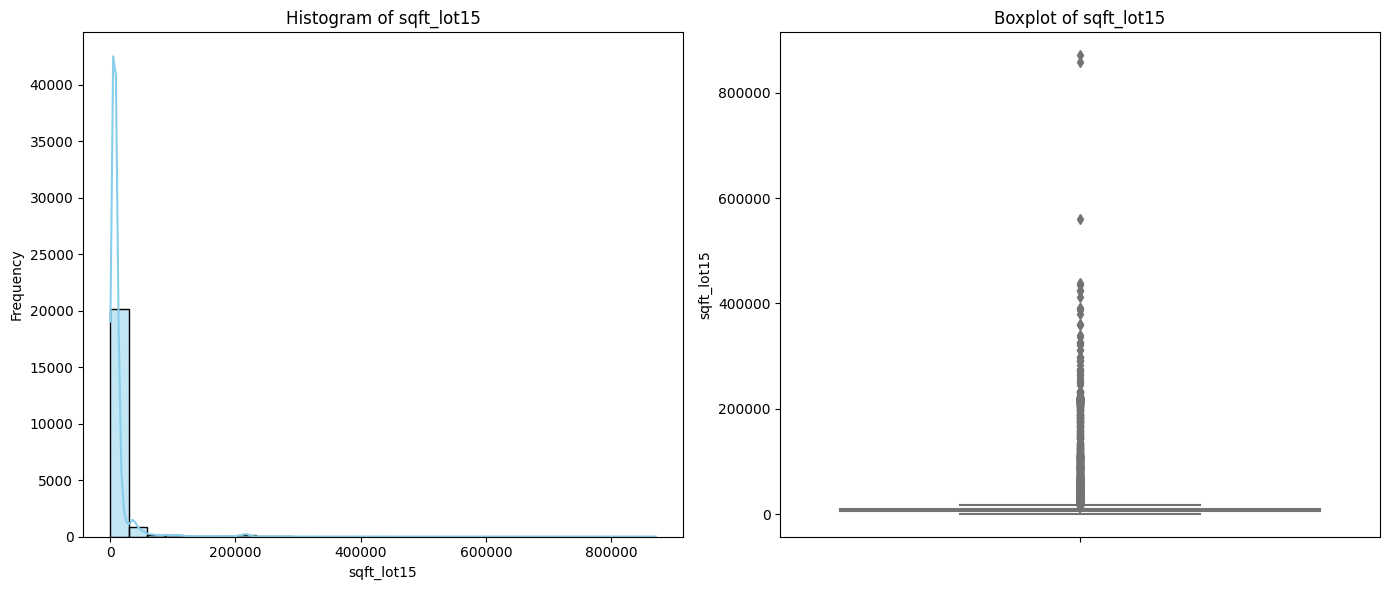

In [18]:
plot_histogram_boxplot(kcdf, "sqft_lot15") 

Distribution: Highly right-skewed, similar to sqft_lotsquare.

Extreme Values: Very large lots in certain neighborhoods are present as outliers.

Center: Around 10,000 sq ft.

## Categorical Data

In [19]:
def plot_categorical_distribution(df, column):
    """
    Generates a count plot and displays a value counts table for a given categorical variable.
    
    Args:
        df (DataFrame): The dataset containing the column.
        column (str): The name of the column to visualize.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette="viridis")
    plt.title(f"Count Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()
    
    # Display value counts in tabular form
    print(f"Counts for {column}:")
    print(df[column].value_counts())
    print("\n")

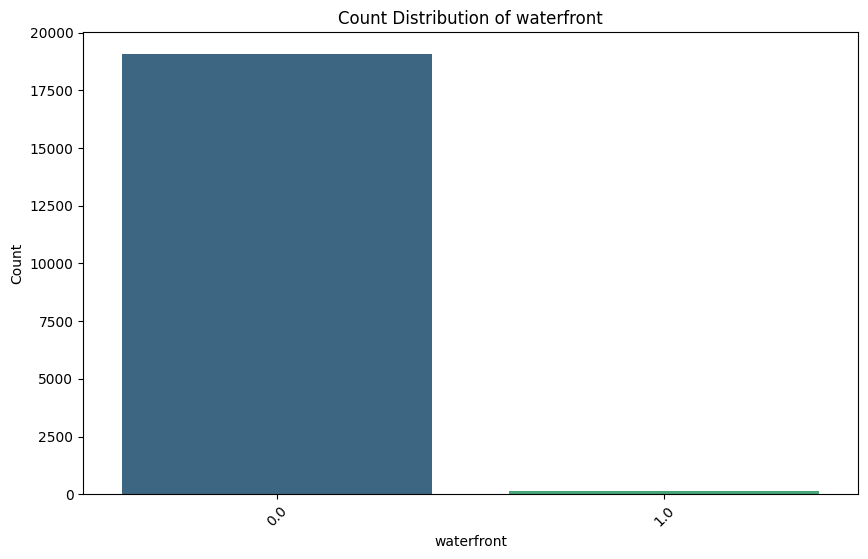

Counts for waterfront:
waterfront
0.0    19060
1.0      146
Name: count, dtype: int64




In [20]:
plot_categorical_distribution(kcdf, "waterfront")

It can be observed that only very few houses have a waterfront view

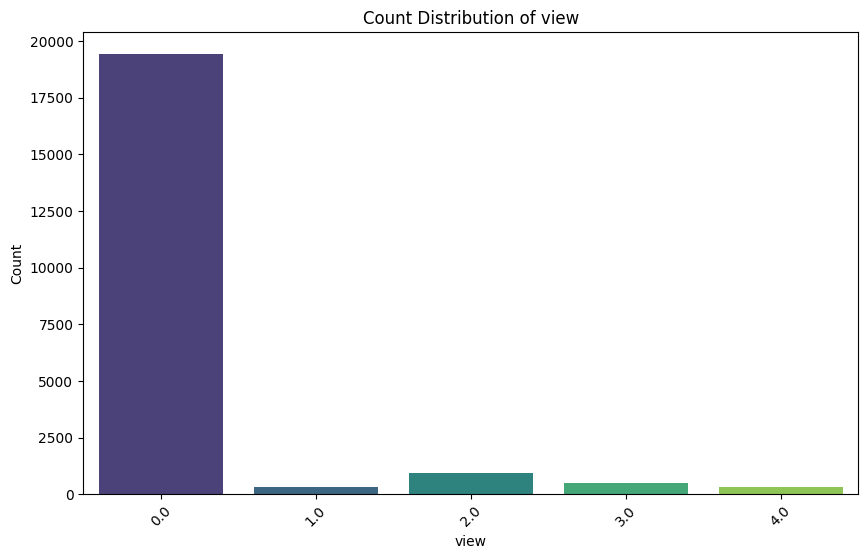

Counts for view:
view
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: count, dtype: int64




In [21]:
plot_categorical_distribution(kcdf, "view")

From this it can be observed that majority of the houses have not been viewed whereas very few houses have been viewed, some more than once. Further exploration is required to understand why this happened. 

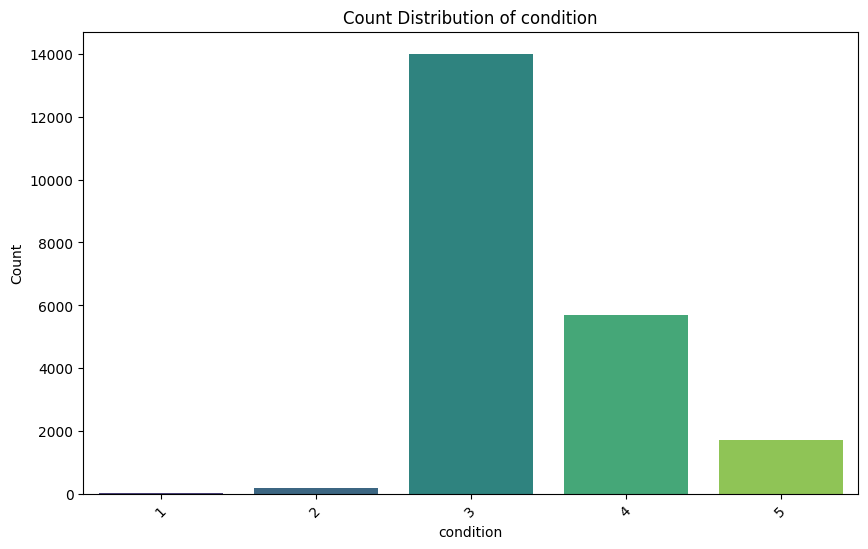

Counts for condition:
condition
3    14020
4     5677
5     1701
2      170
1       29
Name: count, dtype: int64




In [22]:
plot_categorical_distribution(kcdf, "condition")

Based on King County definition of condition(https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) we can see majority of the houses are in an average condition or better. However there are a few houses that definitely need some work.

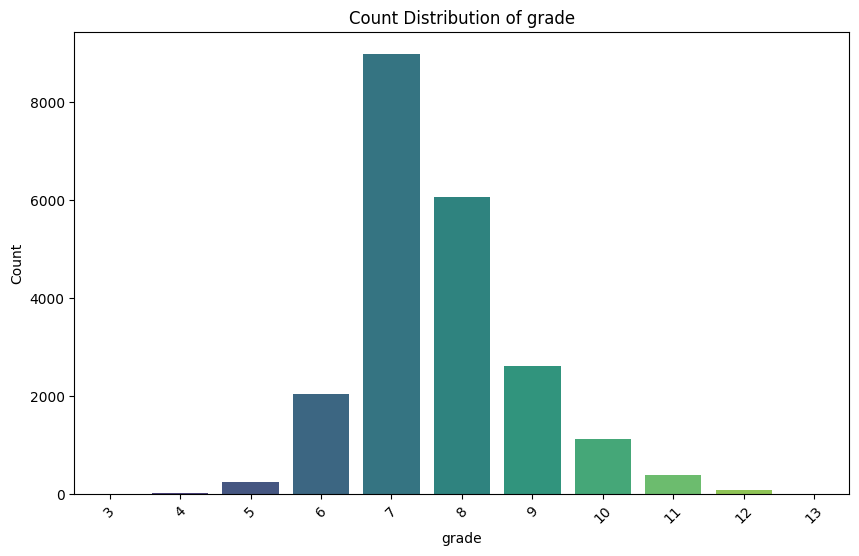

Counts for grade:
grade
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: count, dtype: int64




In [23]:
plot_categorical_distribution(kcdf, "grade")

The majority number of houses are in grade 7. High grage(10-13) are not much. these could be the indication of the outliers from the earlier plots indicating luxury property

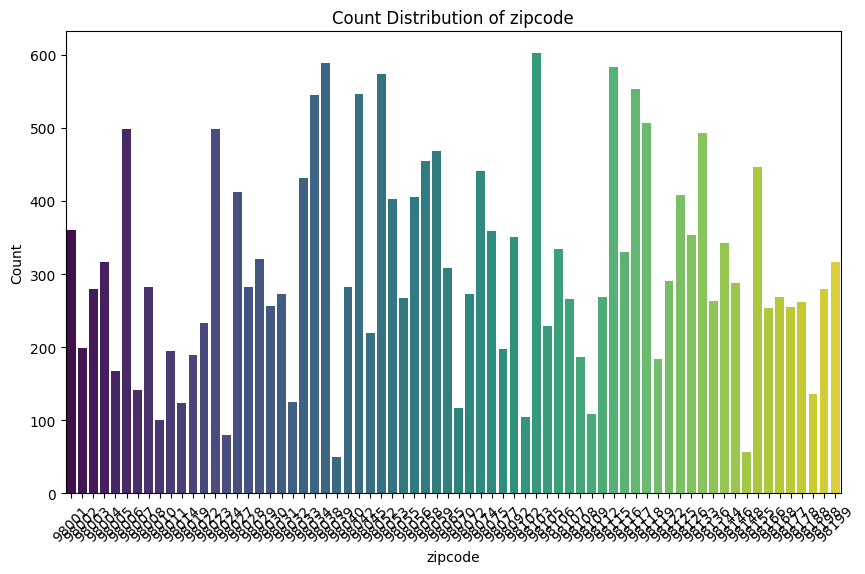

Counts for zipcode:
zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64




In [24]:
plot_categorical_distribution(kcdf, "zipcode")

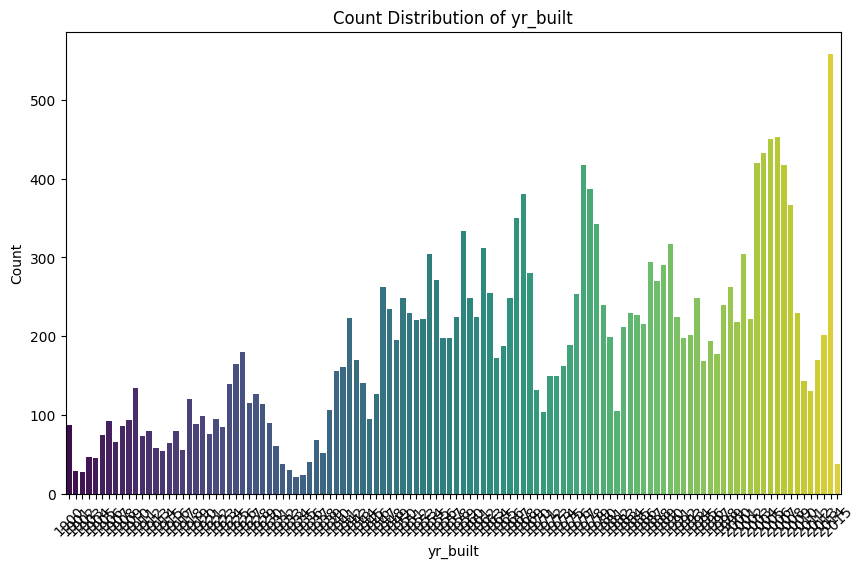

Counts for yr_built:
yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64




In [25]:
plot_categorical_distribution(kcdf, "yr_built")

It can be observed we have houses built over the range of 116 years

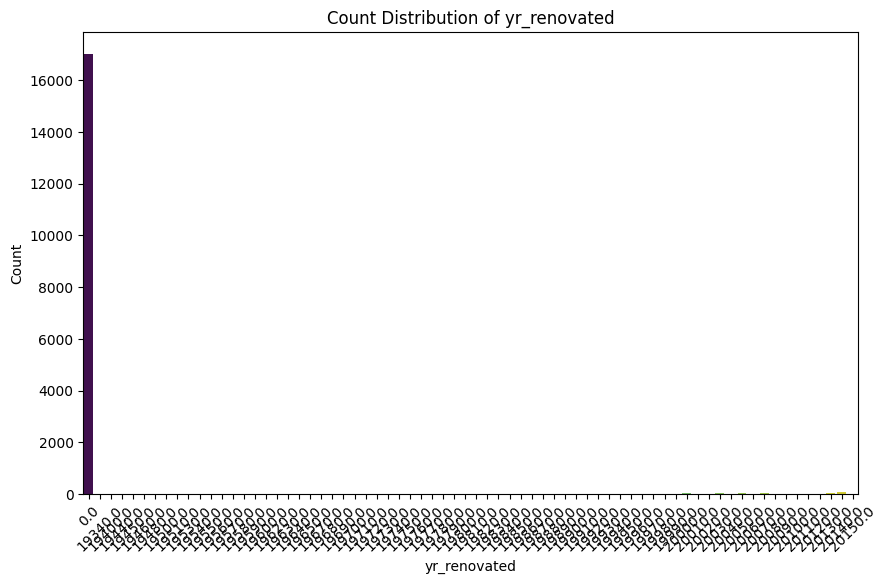

Counts for yr_renovated:
yr_renovated
0.0        17005
20140.0       73
20130.0       31
20030.0       31
20070.0       30
           ...  
19510.0        1
19530.0        1
19460.0        1
19760.0        1
19480.0        1
Name: count, Length: 70, dtype: int64




In [26]:
plot_categorical_distribution(kcdf, "yr_renovated")

Here we can see some unusual thing with the years. We are getting 5 digit ints but it should be 4 digits. Let us remember to fix that in the next part i.e. Data Cleaning

## Data Cleaning

Let us now begin the data cleaning process. As we know this is one of the most important process for us. Let us begin to check if we have any duplicate rows.

In [27]:
#Checking for duplicate rows
kcdf.duplicated().value_counts()

False    21597
Name: count, dtype: int64

As we can see we do not have any duplicate rows. This is a good thing. 



In [28]:
#Checking the data types
kcdf.dtypes

id                     int64
datedate              object
priceprice           float64
bedroomsnumber       float64
bathroomsnumber      float64
sqft_livingsquare    float64
sqft_lotsquare       float64
floorstotal          float64
waterfront           float64
view                 float64
condition              int64
grade                  int64
sqft_above           float64
sqft_basement        float64
yr_built               int64
yr_renovated         float64
zipcode                int64
lat                  float64
long                 float64
sqft_living15        float64
sqft_lot15           float64
dtype: object

Here we can see datadate is of object type. Let us first change the data type

In [29]:
# Convert 'dateDate' column to datetime type
kcdf['datedate'] = pd.to_datetime(kcdf['datedate'], format = '%Y-%m-%d')

# Verify the conversion
kcdf['datedate'].dtypes
kcdf['datedate'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: datedate, dtype: datetime64[ns]

Let us change some of the column names to match the formating required.

In [30]:
#Changing Column Names
kcdf = kcdf.rename({'datedate':'dateDate', 'priceprice':'pricePrice', 'bedroomsnumber':'bedroomsNumber',
                    'bathroomsnumber':'bathroomsNumber', 'floorstotal':'floorsTotal',
                    'view':'view_count'},axis=1)
kcdf.columns

Index(['id', 'dateDate', 'pricePrice', 'bedroomsNumber', 'bathroomsNumber',
       'sqft_livingsquare', 'sqft_lotsquare', 'floorsTotal', 'waterfront',
       'view_count', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

Now that we have changed the column names to the corect format let us proceed to the next part. Taking care of missing values

### Dealing with Missing Values

We have 4 columns which have missing values: 
* waterfront(2391 null values, 11.07% of data), 
* view (63 null values, 0.29% of data), 
* sqft_basement (452 null values, 2.09% of data) 
* yr_renovated (3848 null values, 11.81 % of data)



In [31]:
# import missingno
import missingno as msno

#### For waterfront

From doing the data exploration earlier we know that out of all the properties we have only 146 have waterfront view. This is only a small percentage. So let us say it is safe to assume that the ones with null values do not have a waterfront view and we can just mark them as 0

In [32]:
#Create copy of the original database
kcdf_copy1 = kcdf.copy()
kcdf_copy1

,id,dateDate,pricePrice,bedroomsNumber,bathroomsNumber,sqft_livingsquare,sqft_lotsquare,floorsTotal,waterfront,view_count,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,...,7,1180.0,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7,2170.0,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6,770.0,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7,1050.0,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8,1680.0,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,...,8,1530.0,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0
21593,6600060120,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,...,8,2310.0,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0
21594,1523300141,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,...,7,1020.0,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0
21595,291310100,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,...,8,1600.0,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0


In [33]:
#Replacing all null values with 0
kcdf_copy1['waterfront'] = kcdf_copy1['waterfront'].fillna(0)

In [34]:
#Verifying it has worked
kcdf_copy1.isnull().sum()

id                      0
dateDate                0
pricePrice              0
bedroomsNumber          0
bathroomsNumber         0
sqft_livingsquare       0
sqft_lotsquare          0
floorsTotal             0
waterfront              0
view_count             63
condition               0
grade                   0
sqft_above              0
sqft_basement         452
yr_built                0
yr_renovated         3848
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
dtype: int64

Here we can verify that we have handeled the issue of missing values in the waterfront column.

#### For view_count

Only a very small percentage was left empty. Let us assume it has not been viewed for the purpose of this project

In [35]:
#Replacing all null values with zero
kcdf_copy1['view_count'] = kcdf_copy1['view_count'].fillna(0)

In [36]:
#Verifying it has worked
kcdf_copy1.isnull().sum()

id                      0
dateDate                0
pricePrice              0
bedroomsNumber          0
bathroomsNumber         0
sqft_livingsquare       0
sqft_lotsquare          0
floorsTotal             0
waterfront              0
view_count              0
condition               0
grade                   0
sqft_above              0
sqft_basement         452
yr_built                0
yr_renovated         3848
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
dtype: int64

#### For sqft_basement

We have a sqft_livingsquare and sqft_above. We can take the difference of thee 2 values and that will give the sqft_basement value. 

If sqft_basement = 0 that means there is no basement and if sqft_basement = 'x' then we know there is a basement and we have its size


In [37]:
# Calculate sqft_basement where missing, using the difference
kcdf_copy1['sqft_basement'] = kcdf_copy1.apply(
    lambda row: row['sqft_livingsquare'] - row['sqft_above']
    if pd.isnull(row['sqft_basement']) else row['sqft_basement'], axis=1
)

# Verify there are no more missing values in sqft_basement
print(f"Remaining missing values in sqft_basement: {kcdf_copy1['sqft_basement'].isnull().sum()}")

Remaining missing values in sqft_basement: 0


#### For yr_renovated

For the sake of this project we will be assuming that the null values in this column indicate renovation has not taken place. We also have clean this data a little more.

In [38]:
# Fill missing values in yr_renovated with 0
kcdf_copy1['yr_renovated'] = kcdf_copy1['yr_renovated'].fillna(0)

In [39]:
#Verifying it has worked
kcdf_copy1.isnull().sum()

id                   0
dateDate             0
pricePrice           0
bedroomsNumber       0
bathroomsNumber      0
sqft_livingsquare    0
sqft_lotsquare       0
floorsTotal          0
waterfront           0
view_count           0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

##### Step 2: Fixing the format of the year

In [40]:
# Fix the yr_renovated column by dividing all values by 10
kcdf_copy1['yr_renovated'] = kcdf_copy1['yr_renovated'] / 10

# Convert the column to integers for cleaner representation
kcdf_copy1['yr_renovated'] = kcdf_copy1['yr_renovated'].astype(int)

# Verify the changes
kcdf_copy1.head()


,id,dateDate,pricePrice,bedroomsNumber,bathroomsNumber,sqft_livingsquare,sqft_lotsquare,floorsTotal,waterfront,view_count,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


And with this we come to the end of data imputation 

### Handling Outliers

In [41]:
kcdf2 = kcdf_copy1.copy()
kcdf2

,id,dateDate,pricePrice,bedroomsNumber,bathroomsNumber,sqft_livingsquare,sqft_lotsquare,floorsTotal,waterfront,view_count,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7,1180.0,0.0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7,2170.0,400.0,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6,770.0,0.0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7,1050.0,910.0,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8,1680.0,0.0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,...,8,1530.0,0.0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21593,6600060120,2015-02-23,400000.0,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,...,8,2310.0,0.0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21594,1523300141,2014-06-23,402101.0,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,...,7,1020.0,0.0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21595,291310100,2015-01-16,400000.0,3.0,2.50,1600.0,2388.0,2.0,0.0,0.0,...,8,1600.0,0.0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


In [42]:
import numpy as np

Now dealing with outliers can be tricky. When I look at this data I can there are many outliers and can see the data is skewed as well. But considering that this is Real Estate and more likely than being a mistake, these outliers can be an indication of luxury property and can be treated as legitimate data. For this reason we will be keeping the outliers as is and not removing them. 

However for the purpose of understanding how to deal with them let us take a few of the variables and do some transformation on them

### pricePrice

Since the values are quite large, let us apply log transformation to this data

In [43]:
# Apply log transformation to handle outliers in the 'priceprice' column
kcdf2['log_price'] = np.log(kcdf2['pricePrice']) 

# Display the first few rows to verify the new column
kcdf2[['pricePrice', 'log_price']].head()

,pricePrice,log_price
0,221900.0,12.309982
1,538000.0,13.195614
2,180000.0,12.100712
3,604000.0,13.311329
4,510000.0,13.142166


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


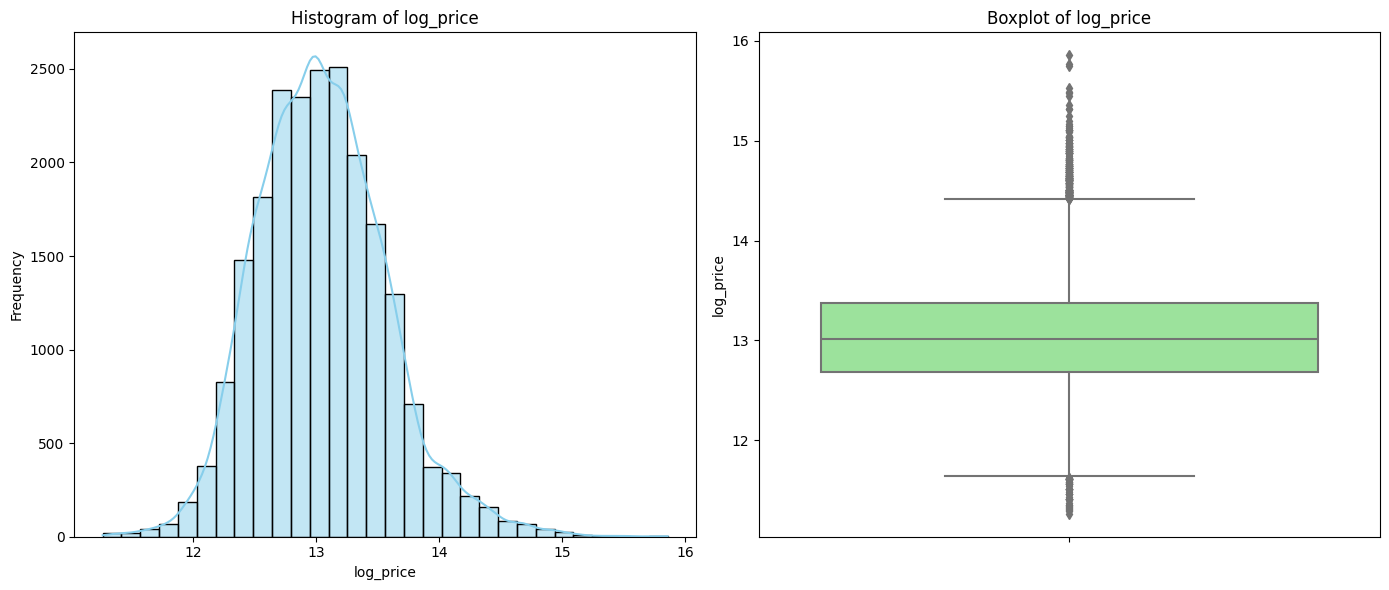

In [44]:
plot_histogram_boxplot(kcdf2, 'log_price')

### sqft_livingsquare

In [45]:
# Apply log transformation to handle outliers in the 'priceprice' column
kcdf2['sqrt_sqft_livingsquare'] = np.sqrt(kcdf2['sqft_livingsquare']) 

# Display the first few rows to verify the new column
kcdf2[['sqft_livingsquare', 'sqrt_sqft_livingsquare']].head()

,sqft_livingsquare,sqrt_sqft_livingsquare
0,1180.0,34.351128
1,2570.0,50.695167
2,770.0,27.748874
3,1960.0,44.271887
4,1680.0,40.987803


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


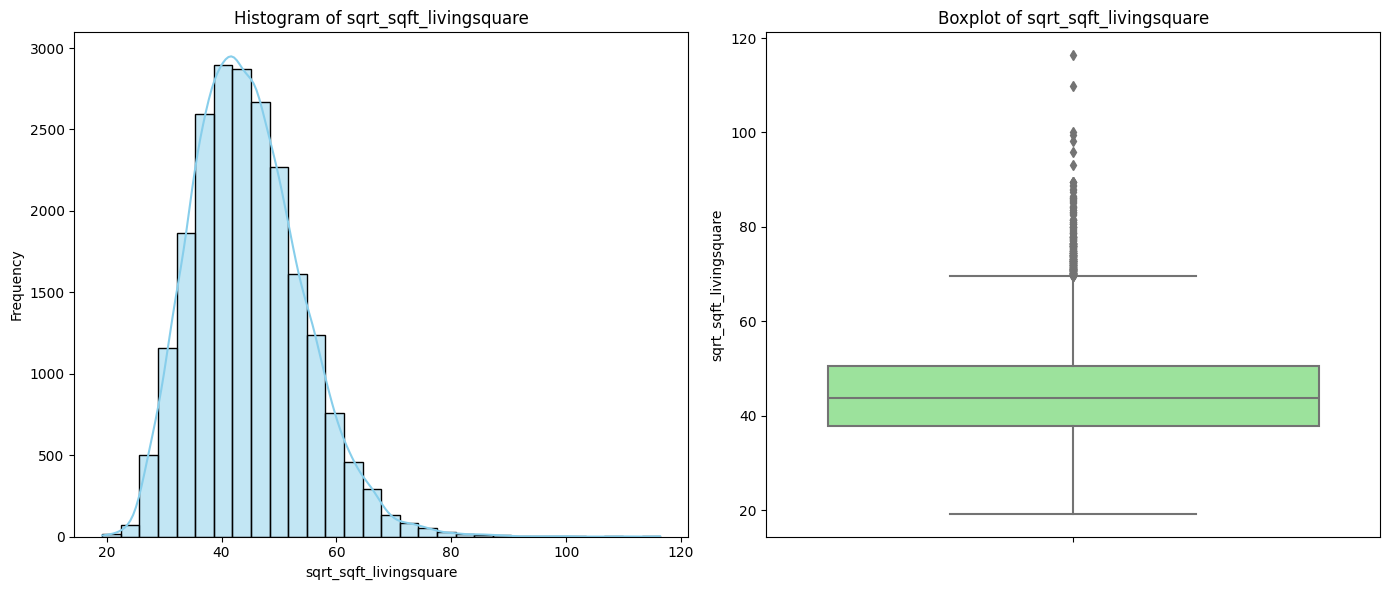

In [46]:
plot_histogram_boxplot(kcdf2, 'sqrt_sqft_livingsquare')

But if we do a log transformation

In [47]:
# Apply log transformation to handle outliers in the 'priceprice' column
kcdf2['log_sqft_livingsquare'] = np.log(kcdf2['sqft_livingsquare']) 

# Display the first few rows to verify the new column
kcdf2[['sqft_livingsquare', 'log_sqft_livingsquare']].head()

,sqft_livingsquare,log_sqft_livingsquare
0,1180.0,7.073270
1,2570.0,7.851661
2,770.0,6.646391
3,1960.0,7.580700
4,1680.0,7.426549


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


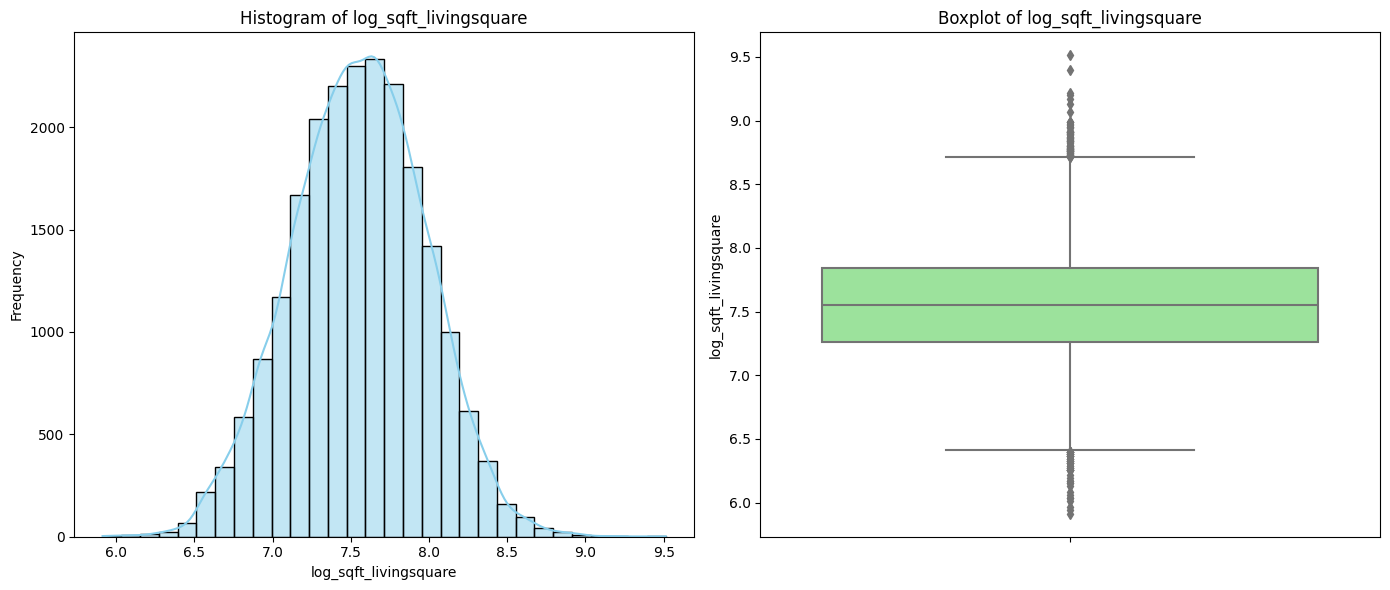

In [48]:
plot_histogram_boxplot(kcdf2, 'log_sqft_livingsquare')

### sqft_lotsquare

In [49]:
# Apply log transformation to handle outliers in the 'priceprice' column
kcdf2['sqrt_sqft_lot'] = np.sqrt(kcdf2['sqft_lotsquare']) 

# Display the first few rows to verify the new column
kcdf2[['sqft_lotsquare', 'sqrt_sqft_lot']].head()

,sqft_lotsquare,sqrt_sqft_lot
0,5650.0,75.166482
1,7242.0,85.099941
2,10000.0,100.000000
3,5000.0,70.710678
4,8080.0,89.888820


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


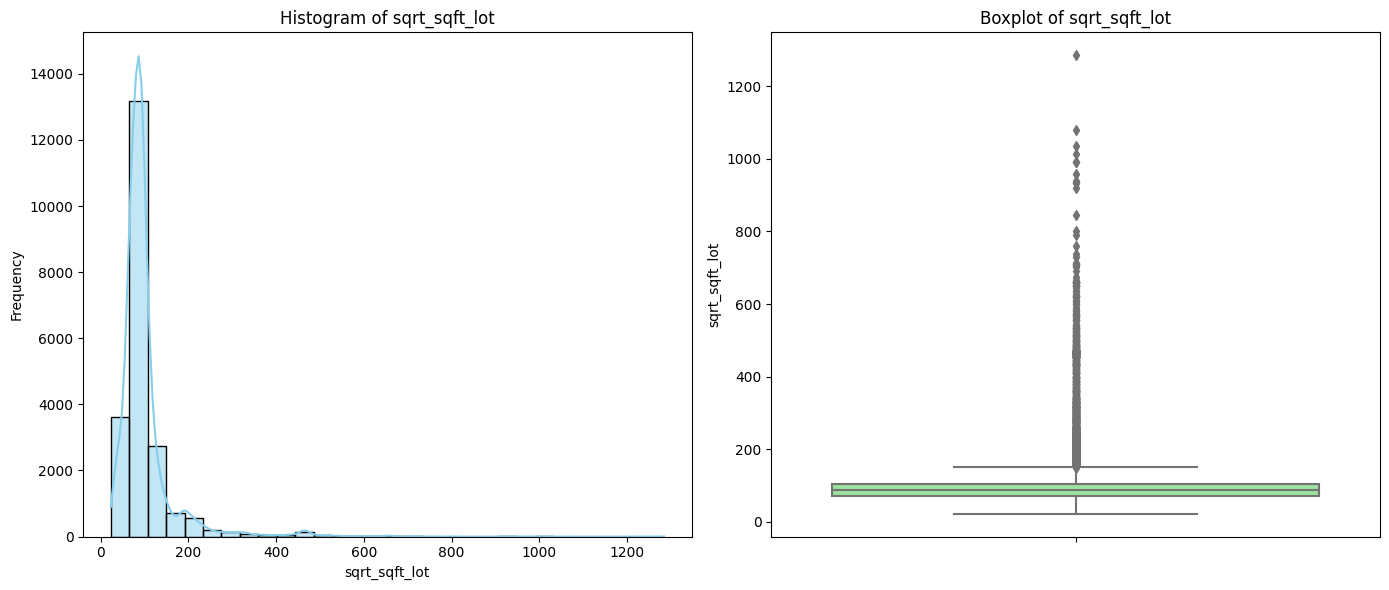

In [50]:
plot_histogram_boxplot(kcdf2, 'sqrt_sqft_lot')

In [51]:
# Apply log transformation to handle outliers in the 'priceprice' column
kcdf2['log_sqft_lot'] = np.log(kcdf2['sqft_lotsquare']) 

# Display the first few rows to verify the new column
kcdf2[['sqft_lotsquare', 'log_sqft_lot']].head()

,sqft_lotsquare,log_sqft_lot
0,5650.0,8.639411
1,7242.0,8.887653
2,10000.0,9.210340
3,5000.0,8.517193
4,8080.0,8.997147


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


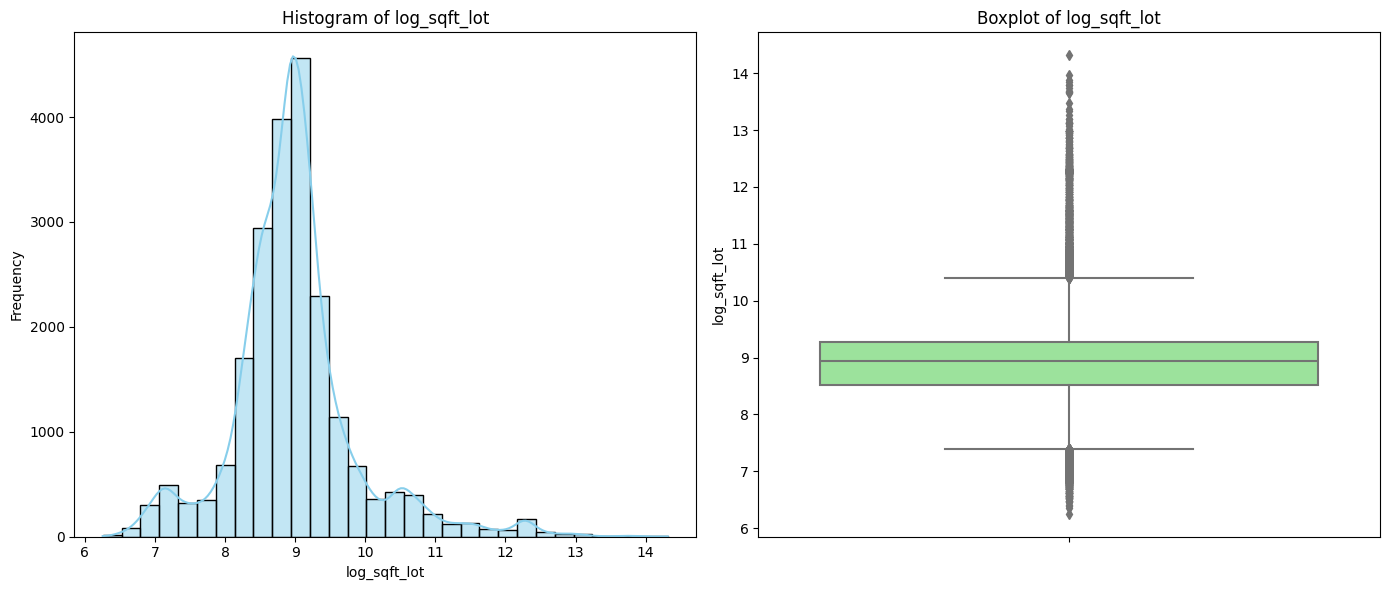

In [52]:
plot_histogram_boxplot(kcdf2, 'log_sqft_lot')

### sqft_basement

In [53]:
# Apply log transformation to handle outliers in the 'priceprice' column
kcdf2['sqrt_sqft_basement'] = np.sqrt(kcdf2['sqft_basement']) 

# Display the first few rows to verify the new column
kcdf2[['sqft_basement', 'sqrt_sqft_basement']].head()

,sqft_basement,sqrt_sqft_basement
0,0.0,0.000000
1,400.0,20.000000
2,0.0,0.000000
3,910.0,30.166206
4,0.0,0.000000


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


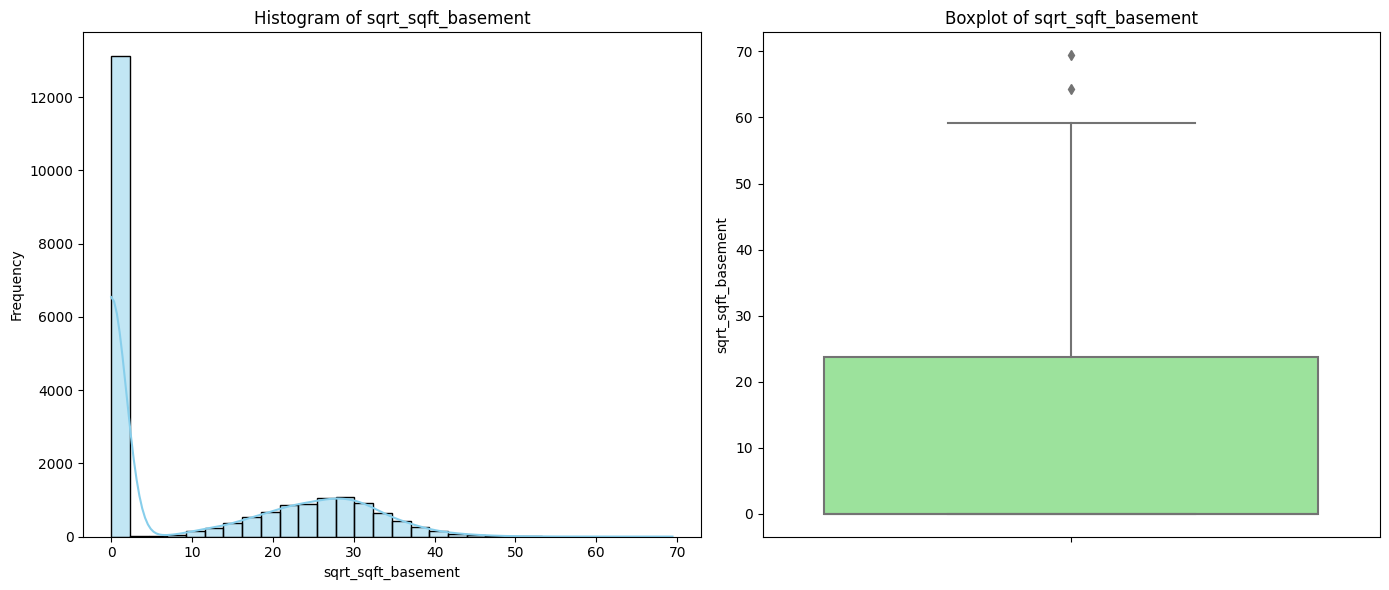

In [54]:
plot_histogram_boxplot(kcdf2, 'sqrt_sqft_basement')

In [55]:
# Apply log transformation to handle outliers in the 'priceprice' column
kcdf2['log_sqft_basement'] = np.log(kcdf2['sqft_basement']) 

# Display the first few rows to verify the new column
kcdf2[['sqft_basement', 'log_sqft_basement']].head()

/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,sqft_basement,log_sqft_basement
0,0.0,-inf
1,400.0,5.991465
2,0.0,-inf
3,910.0,6.813445
4,0.0,-inf


/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/rahulgeorge/Desktop/Coriander_heatmap/pair_exercise/EDA-RealEstate-Data/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


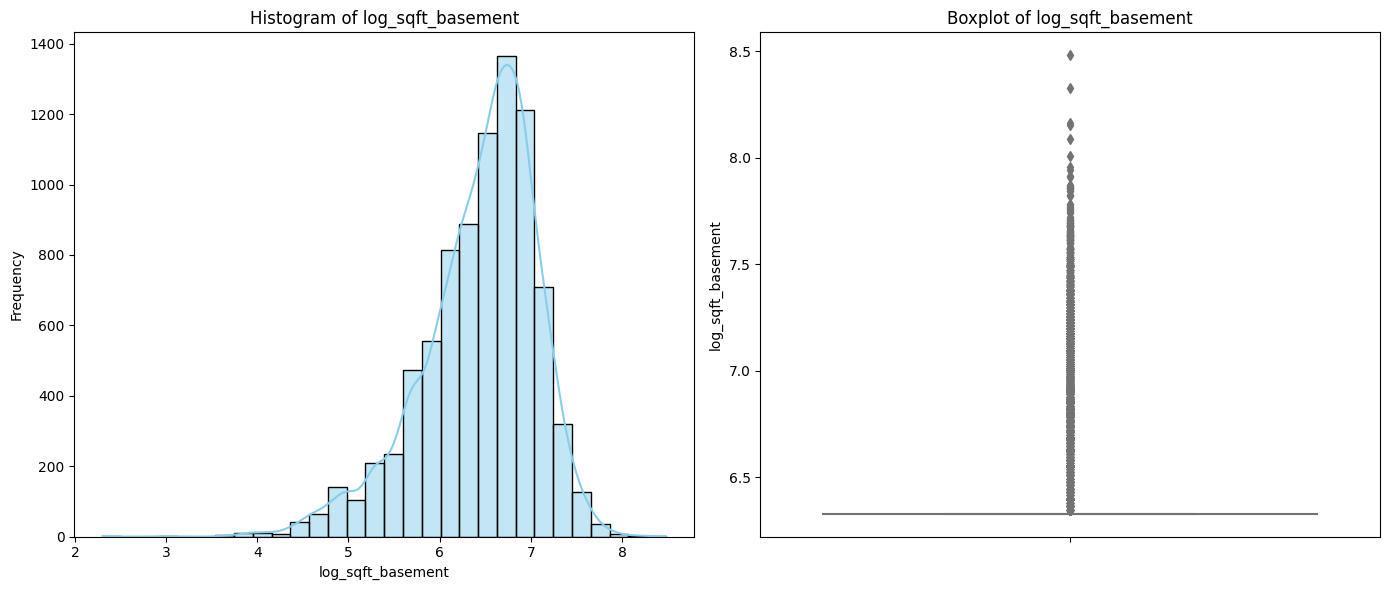

In [56]:
plot_histogram_boxplot(kcdf2, 'log_sqft_basement')

Doing this we can see how the transformation affected affected how the data looked when plotted on a histogram and box plot. We can also see based on which type of transformation used how it varies and it can be concluded the type of tranformation used is also very important.

## Hypotheses Testing

It is now time to test our hypothesis. 

But first let us plot the correlation matrix for the whole dataset

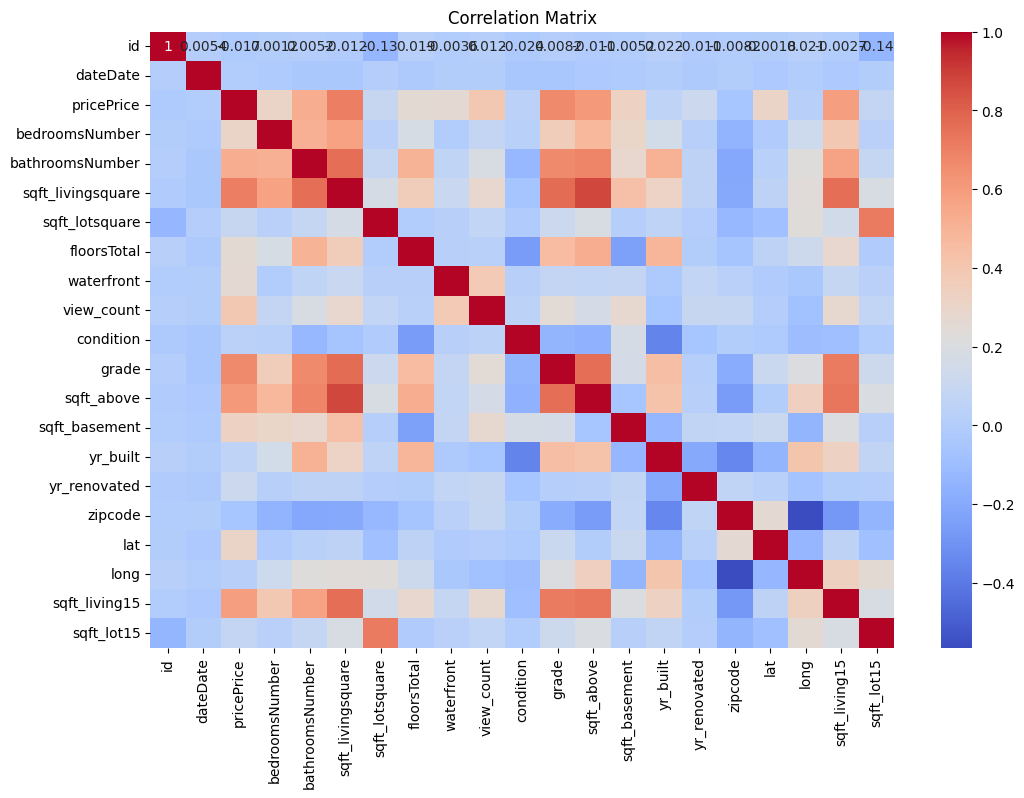

In [57]:
correlation_matrix = kcdf_copy1.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Hypothesis 1: Houses with more floors have larger living spaces

In [58]:
#Importing the required module
from scipy.stats import pearsonr

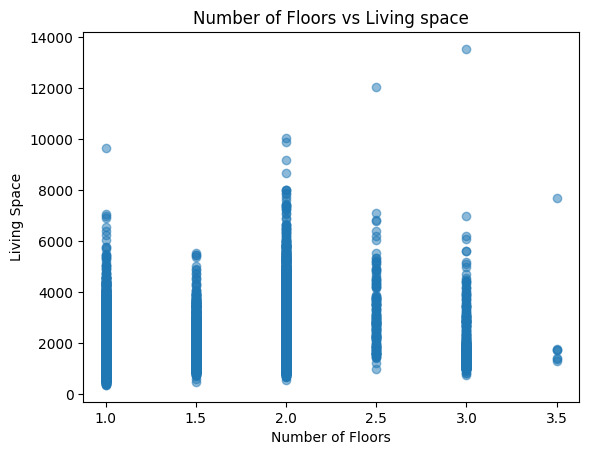

In [59]:

#Plotting a scatter plot
plt.scatter(kcdf2['floorsTotal'], kcdf2['sqft_livingsquare'], alpha=0.5)
plt.title('Number of Floors vs Living space')
plt.xlabel('Number of Floors')
plt.ylabel('Living Space')
plt.show()

In [60]:
#Getting the Correlation and P-Value
correlation, p_value = pearsonr(kcdf2['floorsTotal'], kcdf2['sqft_livingsquare'])
                                
print(correlation)
print(p_value)                                

0.3539533118543095
0.0


Correlation = 0.3539:

+ This shows a moderate positive linear relationship between the two variables.
+ As one variable increases, the other tends to increase as well, but not very strongly.
+ While it's not a strong relationship, it still suggests some level of association.

P-value = 0:

+ The p-value is very small (essentially 0), which means the relationship is statistically significant.
+ This indicates that the observed correlation is not due to random chance, and we can confidently say there is a relationship between the two variables in the population.


### Hypothesis 2: Historical houses that have been renovated have larger basement areas compared to historical houses that have not been renovated.(Historical house yr_built < 1940)

In [61]:
#Importingthe required module
from scipy.stats import ttest_ind

4.818359665471009
2.0287632933155635e-06


/var/folders/1f/x6zpshws65x7vcl9wjn16fm40000gn/T/ipykernel_50829/4163507847.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([not_renovated, renovated], labels=['Not Renovated', 'Renovated'], patch_artist=True)


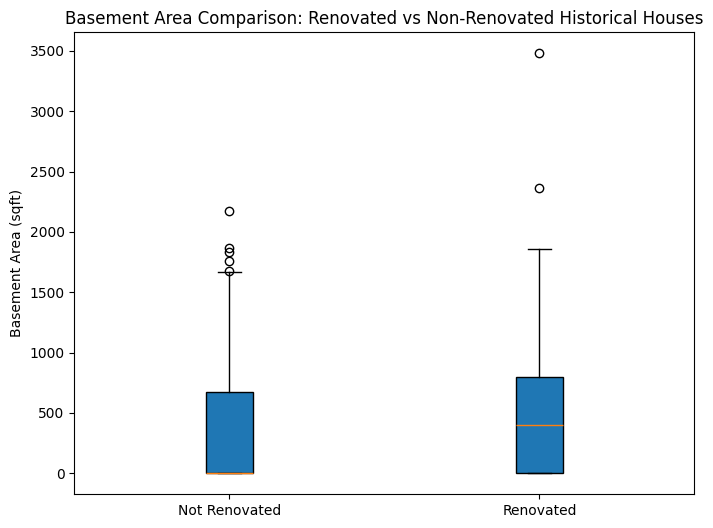

In [62]:
# Filter for historical houses (built before 1940)
historical_houses_kcdf = kcdf2[kcdf2['yr_built'] <= 1940]


# Divide into renovated and non-renovated groups
renovated = historical_houses_kcdf[historical_houses_kcdf['yr_renovated'] > 0]['sqft_basement']
not_renovated = historical_houses_kcdf[historical_houses_kcdf['yr_renovated'] == 0]['sqft_basement']

# Perform t-test
t_stat, p_value = ttest_ind(renovated, not_renovated, equal_var=False)

print(t_stat)
print(p_value)

# Visualize with boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([not_renovated, renovated], labels=['Not Renovated', 'Renovated'], patch_artist=True)
plt.title("Basement Area Comparison: Renovated vs Non-Renovated Historical Houses")
plt.ylabel("Basement Area (sqft)")
plt.show()

T-Statistic: 4.818

+ This indicates a strong difference between the means of basement areas for renovated and non-renovated historical houses.
+ A higher t-statistic suggests that the observed difference is substantial compared to the variability within the groups.

P-Value: 0.00000203
+ The p-value is far smaller than the significance threshold (𝛼 = 0.05)
+ This indicates that the observed difference is statistically significant and unlikely to have occurred by random chance.

### H3: Houses located closer to the city center have higher price per square foot compared to houses on the outskirts.

In [63]:
#Importing the requred module
from haversine import haversine, Unit

In [64]:
#Define city center coordinates
city_center_coords = (47.620564, -122.350616)

In [65]:
# Calculate distance to city center using haversine
kcdf2['distance_to_center'] = kcdf2.apply(
    lambda row: haversine((row['lat'], row['long']), city_center_coords, unit=Unit.MILES),
    axis=1
)


In [66]:
#Calculating Price per Sqft
kcdf2['price_per_sqft'] = kcdf2['pricePrice'] / kcdf2['sqft_livingsquare']

In [67]:
#Getting the correlation and p-value
correlation, p_value = pearsonr(kcdf2['distance_to_center'], kcdf2['price_per_sqft'])
print(correlation)
print(p_value)


-0.5662932702298095
0.0


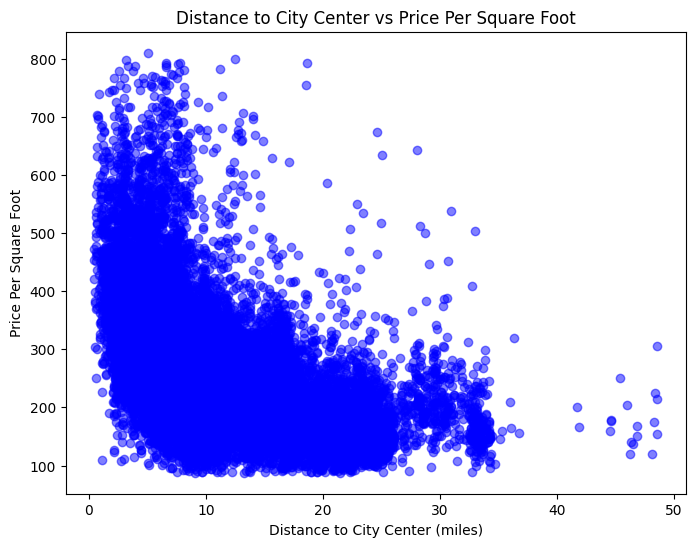

In [68]:
#Creating a scatter plot for cisual confirmation
plt.figure(figsize=(8, 6))
plt.scatter(kcdf2['distance_to_center'], kcdf2['price_per_sqft'], alpha=0.5, c='blue')
plt.title(f"Distance to City Center vs Price Per Square Foot")
plt.xlabel("Distance to City Center (miles)")
plt.ylabel("Price Per Square Foot")
plt.show()

We can see here that our hypothesis is proved to be correct

### Checking Realtion With Price

#### number of Floors v/s Price

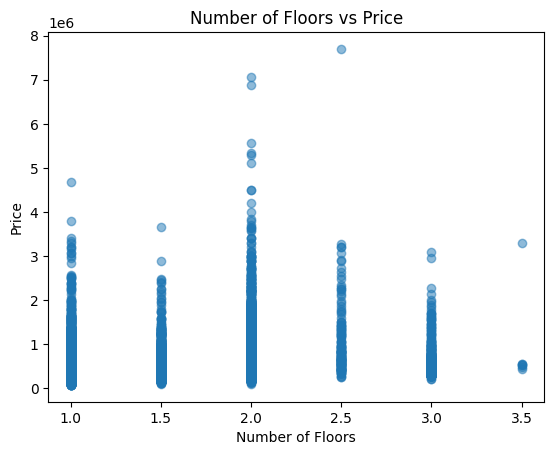

In [69]:
#Plotting a scatter plot
plt.scatter(kcdf2['floorsTotal'], kcdf2['pricePrice'], alpha=0.5)
plt.title('Number of Floors vs Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()

In [70]:
#Getting correlation and p-value
corr_FvP, p_value = pearsonr(kcdf2['floorsTotal'], kcdf2['pricePrice'])
                                
print(corr_FvP)
print(p_value)    

0.2568035370080217
2.57e-322


A very weak correlation between the two variables 

### Living space v/s Price

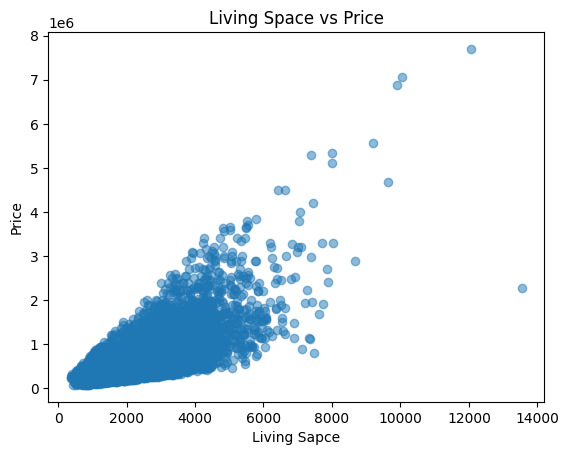

In [71]:
#Plotting a scatter plot
plt.scatter(kcdf2['sqft_livingsquare'], kcdf2['pricePrice'], alpha=0.5)
plt.title('Living Space vs Price')
plt.xlabel('Living Sapce')
plt.ylabel('Price')
plt.show()

In [72]:
corr_LSvP, p_value = pearsonr(kcdf2['sqft_livingsquare'], kcdf2['pricePrice'])
                                
print(corr_LSvP)
print(p_value)  

0.7019173021377594
0.0


As expected we can see a strong correlation here

### Basement V/S Price

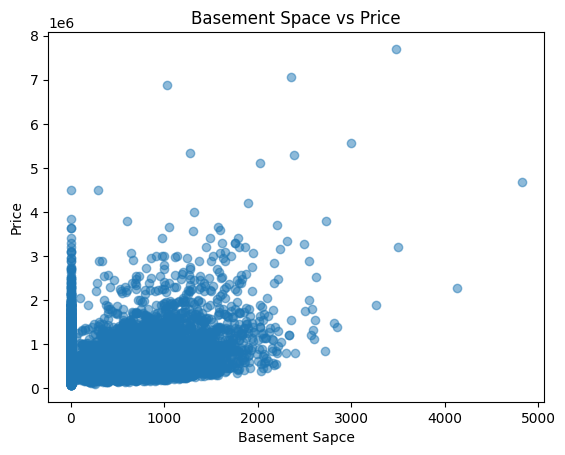

In [73]:
#Plotting a scatter plot
plt.scatter(kcdf2['sqft_basement'], kcdf2['pricePrice'], alpha=0.5)
plt.title('Basement Space vs Price')
plt.xlabel('Basement Sapce')
plt.ylabel('Price')
plt.show()

In [74]:
#Computing Correlation and P-Value
corr_BSvP, p_value = pearsonr(kcdf2['sqft_basement'], kcdf2['pricePrice'])
                                
print(corr_BSvP)
print(p_value)  

0.3237989068990479
0.0


Not a very strong correlation here

### Grade v/s Price

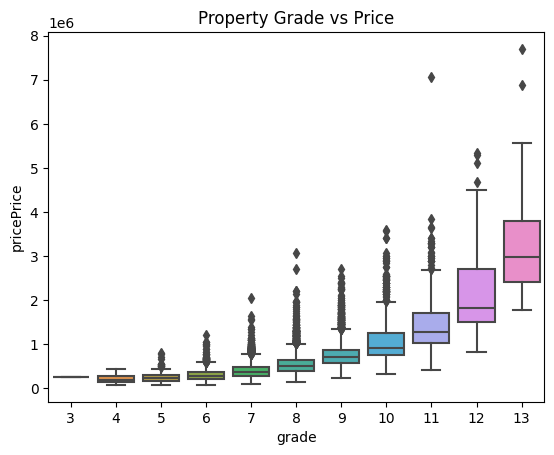

In [75]:
#Plotting a scatter plot
sns.boxplot(x='grade', y='pricePrice', data=kcdf2)
plt.title('Property Grade vs Price')
plt.show()

A bit expected as it is a logical assumption that higher grade houses will have higher prices

### Condition v/s Price

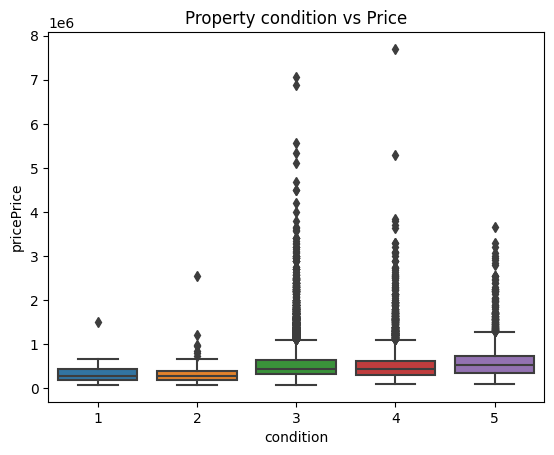

In [76]:
#Plotting a scatter plot
sns.boxplot(x='condition', y='pricePrice', data=kcdf2)
plt.title('Property condition vs Price')
plt.show()

### Lot size v/s Price

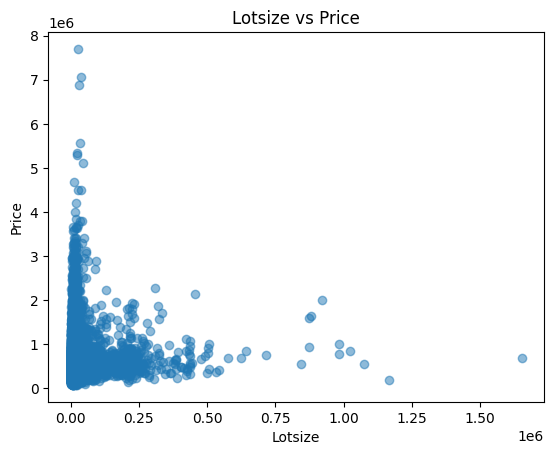

In [77]:
#Plotting a scatter plot
plt.scatter(kcdf2['sqft_lotsquare'], kcdf2['pricePrice'], alpha=0.5)
plt.title('Lotsize vs Price')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.show()

In [78]:
#Computing Correlation and P-Value
corr_LtSvP, p_value = pearsonr(kcdf2['sqft_lotsquare'], kcdf2['pricePrice'])
                                
print(corr_LtSvP)
print(p_value)  

0.08987622099083864
5.571622021763992e-40


### Historic House V Price

In [79]:
#Seperating the houses to historical and non hitorical houses
historical_houses = kcdf2[kcdf2['yr_built'] <= 1940]
non_historical_houses = kcdf2[kcdf2['yr_built'] > 1940]

# Extract prices for both groups
prices_historical = historical_houses['pricePrice']
prices_non_historical = non_historical_houses['pricePrice']

In [80]:
#Computing the T-Static and p-value
t_stat, p_value = ttest_ind(prices_historical, prices_non_historical, equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: 9.428994543709331
P-Value: 6.6058442470362385e-21


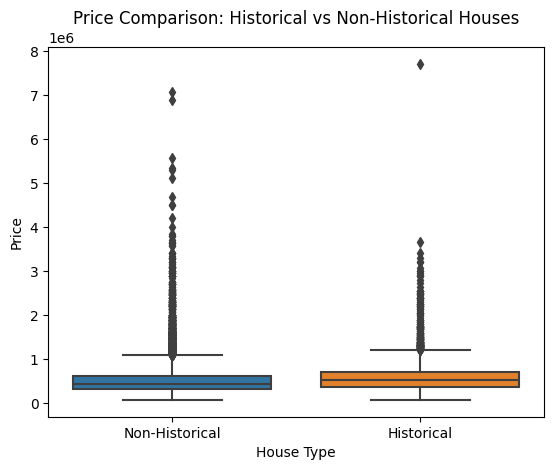

In [81]:
kcdf2['is_historical'] = kcdf2['yr_built'] < 1940

#Plotting a Boxplot
sns.boxplot(x='is_historical', y='pricePrice', data=kcdf2)
plt.xticks([0, 1], ['Non-Historical', 'Historical'])
plt.title("Price Comparison: Historical vs Non-Historical Houses")
plt.xlabel("House Type")
plt.ylabel("Price")
plt.show()

### Recomendations for my client

In [82]:
#Creating a list which hold the coordiunates of all golf courses in King County
GOLF_COURSES = [
    (47.5663, -122.3779),  # West Seattle Golf Course
    (47.6923, -122.2687),  # Sand Point Country Club
    (47.6417, -122.1407),  # Bellevue Golf Course
    (47.6397, -122.2877)   # Broadmoor Golf Club
]

In [83]:
#Creating a function to calculate the distance to golf course from property
def distance_to_golf(lat, long):
    property_coords = (lat, long)
    distances = [haversine(property_coords, golf_coords, unit=Unit.MILES) for golf_coords in GOLF_COURSES]
    return min(distances)

In [84]:
# Calculate distance to golf courses
kcdf2['distance_to_golf'] = kcdf2.apply(lambda row: distance_to_golf(row['lat'], row['long']), axis=1)


In [85]:
#Creating a filtered database according to client conditions
filtered_kcdf = kcdf2[
    (kcdf2['bathroomsNumber'] >= 4) &
    (kcdf2['sqft_lotsquare'] >= 18000) &
    (kcdf2['yr_built'] < 1940) &
    (kcdf2['waterfront'] == 0) &
    (kcdf2['distance_to_golf'] <= 5)
]

In [86]:
# Rank properties by distance to golf, lot size, and bathrooms
filtered_kcdf = filtered_kcdf.sort_values(
    by=['distance_to_golf', 'sqft_lotsquare', 'bathroomsNumber'],
    ascending=[True, False, False]
)

In [87]:
# Select relevant columns for recommendations
recommendations = filtered_kcdf[[
    'id', 'pricePrice', 'bathroomsNumber', 'sqft_lotsquare', 'yr_built',
    'lat', 'long', 'distance_to_golf', 'grade', 'condition'
]]

# Print recommendations
print("Recommended Properties for Jacob Phillips:")
recommendations

Recommended Properties for Jacob Phillips:


,id,pricePrice,bathroomsNumber,sqft_lotsquare,yr_built,lat,long,distance_to_golf,grade,condition
18314,5317100750,2920000.0,4.75,24085.0,1926,47.6263,-122.284,0.941743,10,5
14172,1333300145,2230000.0,4.00,30120.0,1933,47.6379,-122.311,1.091845,11,4
7245,6762700020,7700000.0,8.00,27600.0,1910,47.6298,-122.323,1.780191,13,4
5961,5249800010,2730000.0,4.25,43838.0,1906,47.5703,-122.280,4.572270,12,4


Here I got a list of properties to recomend my client. But looking at these recomendations I feel I can add more to the recommendations by lloking into the condition "A small house nearby"

In [88]:
# Extract small houses
small_houses = kcdf2[kcdf2['sqft_livingsquare'] < 2000]#setting a threshold

In [89]:
# Get coordinates of recommended houses
recommended_houses_coords = filtered_kcdf[['lat', 'long']].values

In [90]:
# Create an empty list to store results
nearby_small_houses = []

In [91]:

# Calculate distances for each recommended house to all small houses
for rec_coords in recommended_houses_coords:
    distances = small_houses[['lat', 'long']].apply(
        lambda row: haversine((row['lat'], row['long']), rec_coords, unit=Unit.MILES),
        axis=1
    )
    # Select small houses within the proximity distance
    nearby_small_houses.append(small_houses[distances <= 0.2])

In [92]:
nearby_small_houses_kcdf = pd.concat(nearby_small_houses)

In [93]:
# Combine all results into a single DataFrame
nearby_small_houses_kcdf = nearby_small_houses_kcdf[[
    'id', 'pricePrice', 'bathroomsNumber', 'sqft_lotsquare', 'sqft_livingsquare',
    'yr_built', 'lat', 'long', 'grade', 'condition'
]]

In [94]:
print("Small Houses Near Recommended Properties:")
nearby_small_houses_kcdf

Small Houses Near Recommended Properties:


,id,pricePrice,bathroomsNumber,sqft_lotsquare,sqft_livingsquare,yr_built,lat,long,grade,condition
16506,9185700414,1180000.0,1.75,7200.0,1610.0,1973,47.6279,-122.287,8,3
6019,2158900290,920000.0,1.50,3600.0,1850.0,1929,47.6376,-122.307,8,3
8993,2125049131,680000.0,1.75,5500.0,1620.0,1950,47.6393,-122.308,7,3
18286,2125049133,715000.0,1.75,6500.0,1920.0,1951,47.6394,-122.308,7,3
5183,2663000050,525000.0,1.00,4000.0,1570.0,1920,47.6275,-122.321,7,3
20755,6762700376,650000.0,2.75,1251.0,1540.0,2002,47.6298,-122.321,8,3
20901,6762700452,575000.0,3.00,1287.0,1384.0,2006,47.6295,-122.320,8,3
21055,2163900081,1080000.0,2.50,1891.0,1990.0,2012,47.6271,-122.324,9,3
5531,7950300005,681000.0,1.00,6356.0,1700.0,1907,47.5677,-122.281,7,3


Here we got the recomendations for the small house. We are now ready to go and present Mr. Jacob Phillips our recommendations. 